In [14]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import numpy as np

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# import dataset
1. connectome data
2. age data
3. NIH score data

In [3]:
###DATA : change? (정우쌤꺼는 connectome으로 되어있었다)
#connectome = pd.read_csv('../dMRI network analysis/data/con_aparc_count.csv', index_col=0)


#nih_demo : all metadata, nih, demo : 그 중 몇개를 뺀 것
#추가적으로 더 나누기?? 
#self로 저장하기? (or in the dataloading thing?)
nih_demo = pd.read_csv('/storage/bigdata/ABCD/TVB/demo.nih.cbcl.els.11875.csv', index_col=0)
nih = nih_demo.loc[:, :'nihtbx_picvocab_uncorrected'].dropna()
demo = nih_demo.iloc[:, -11:].dropna()

In [13]:
print(demo.index)
print(demo.columns)
print(nih.index)
print(nih.columns)
print(nih_demo.columns)
pd.concat([nih, demo], join='inner', axis=1)

Index(['NDARINV003RTV85', 'NDARINV007W6H7B', 'NDARINV00BD7VDC',
       'NDARINV00CY2MDM', 'NDARINV00LH735Y', 'NDARINV00LJVZK2',
       'NDARINV00NPMHND', 'NDARINV00R4TXET', 'NDARINV00U4FTRU',
       'NDARINV00UMK5VC',
       ...
       'NDARINVZZ81LEEV', 'NDARINVZZFG6J5U', 'NDARINVZZJ3A7BK',
       'NDARINVZZL0VA2F', 'NDARINVZZLZCKAY', 'NDARINVZZNX6W2P',
       'NDARINVZZPKBDAC', 'NDARINVZZZ2ALR6', 'NDARINVZZZNB0XC',
       'NDARINVZZZP87KR'],
      dtype='object', name='subjectkey', length=10470)
Index(['age', 'female', 'race.ethnicity', 'high.educ', 'income', 'married',
       'abcd_site', 'vol', 'height', 'weight', 'BMI'],
      dtype='object')
Index(['NDARINV003RTV85', 'NDARINV007W6H7B', 'NDARINV00BD7VDC',
       'NDARINV00CY2MDM', 'NDARINV00LH735Y', 'NDARINV00LJVZK2',
       'NDARINV00NPMHND', 'NDARINV00R4TXET', 'NDARINV00U4FTRU',
       'NDARINV00UMK5VC',
       ...
       'NDARINVZZ6ZJ2KY', 'NDARINVZZ81LEEV', 'NDARINVZZFG6J5U',
       'NDARINVZZJ3A7BK', 'NDARINVZZL0VA2F', 'NDARI

,nihtbx_totalcomp_uncorrected,nihtbx_fluidcomp_uncorrected,nihtbx_pattern_uncorrected,nihtbx_picture_uncorrected,nihtbx_list_uncorrected,nihtbx_flanker_uncorrected,nihtbx_cardsort_uncorrected,nihtbx_cryst_uncorrected,nihtbx_reading_uncorrected,nihtbx_picvocab_uncorrected,...,female,race.ethnicity,high.educ,income,married,abcd_site,vol,height,weight,BMI
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDARINV003RTV85,0.632147,0.605564,0.750129,0.595775,0.029448,0.765919,-0.265161,0.515576,-0.702565,1.299253,...,1.0,1.0,13.0,8.0,1.0,6,-1.050932,56.500,93.0,20.480539
NDARINV007W6H7B,1.069812,0.887103,0.133034,1.258381,0.691208,0.218719,0.470950,1.081777,0.889420,1.052843,...,0.0,1.0,19.0,10.0,1.0,22,1.293196,56.500,82.8,18.234286
NDARINV00BD7VDC,0.632147,1.544026,1.024394,0.761427,2.262887,0.984799,-0.160002,-0.899925,-0.847291,-0.795233,...,0.0,1.0,20.0,10.0,1.0,7,1.129021,57.500,76.8,16.329800
NDARINV00CY2MDM,-0.462016,-0.614436,-0.415495,-0.812261,-1.542232,0.984799,0.365791,-0.050624,0.889420,-0.918438,...,0.0,1.0,15.0,6.0,4.0,20,0.334811,56.500,91.5,20.150208
NDARINV00LH735Y,-1.227931,-1.365205,-1.718251,1.092729,-1.873112,-0.875681,-0.896113,-0.758375,-0.702565,-0.672028,...,0.0,3.0,13.0,6.0,1.0,3,0.503904,52.000,80.0,20.798817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARINVZZLZCKAY,-0.462016,-0.614436,-0.415495,-0.729436,0.029448,-0.219041,-0.685795,-0.192174,0.021065,-0.425618,...,1.0,1.0,15.0,9.0,1.0,6,-0.242144,59.500,123.0,24.424546
NDARINVZZNX6W2P,0.632147,1.074795,1.298658,0.678601,-0.549592,1.313120,0.996743,-0.333725,-0.123661,-0.425618,...,0.0,1.0,18.0,9.0,1.0,14,-0.208130,56.000,73.0,16.364477
NDARINVZZPKBDAC,0.085065,-0.051359,-0.964023,0.678601,0.029448,0.437599,-0.160002,0.232476,0.021065,0.436818,...,1.0,1.0,19.0,10.0,1.0,12,-0.274180,58.875,90.0,18.253073


### Playing Around

### 1. correlation

In [54]:
print(type(merged_data['age']))
series = merged_data['age']
print(series.index)
#type(merged_data)
merged_data.columns

<class 'pandas.core.series.Series'>
Index(['NDARINV003RTV85', 'NDARINV007W6H7B', 'NDARINV00BD7VDC',
       'NDARINV00CY2MDM', 'NDARINV00LH735Y', 'NDARINV00LJVZK2',
       'NDARINV00NPMHND', 'NDARINV00R4TXET', 'NDARINV00U4FTRU',
       'NDARINV00UMK5VC',
       ...
       'NDARINVZZ6ZJ2KY', 'NDARINVZZ81LEEV', 'NDARINVZZFG6J5U',
       'NDARINVZZJ3A7BK', 'NDARINVZZL0VA2F', 'NDARINVZZLZCKAY',
       'NDARINVZZNX6W2P', 'NDARINVZZPKBDAC', 'NDARINVZZZ2ALR6',
       'NDARINVZZZNB0XC'],
      dtype='object', name='subjectkey', length=10243)


Index(['nihtbx_totalcomp_uncorrected', 'nihtbx_fluidcomp_uncorrected',
       'nihtbx_pattern_uncorrected', 'nihtbx_picture_uncorrected',
       'nihtbx_list_uncorrected', 'nihtbx_flanker_uncorrected',
       'nihtbx_cardsort_uncorrected', 'nihtbx_cryst_uncorrected',
       'nihtbx_reading_uncorrected', 'nihtbx_picvocab_uncorrected', 'age',
       'female', 'race.ethnicity', 'high.educ', 'income', 'married',
       'abcd_site', 'vol', 'height', 'weight', 'BMI'],
      dtype='object')

In [36]:
## playing arround ##
merged_data = pd.concat([nih, demo], join='inner', axis=1)
corr_result = pd.DataFrame()
for measure in nih.columns:
    print(measure)
    corr_result = pd.concat([corr_result, pd.DataFrame(pg.corr(merged_data[measure], merged_data['age']))], axis=0)
corr_result.index = nih.columns #setting the names
corr_result


nihtbx_totalcomp_uncorrected
nihtbx_fluidcomp_uncorrected
nihtbx_pattern_uncorrected
nihtbx_picture_uncorrected
nihtbx_list_uncorrected
nihtbx_flanker_uncorrected
nihtbx_cardsort_uncorrected
nihtbx_cryst_uncorrected
nihtbx_reading_uncorrected
nihtbx_picvocab_uncorrected


,n,r,CI95%,p-val,BF10,power
nihtbx_totalcomp_uncorrected,10243,0.304451,"[0.29, 0.32]",1.256724e-218,2.313e+214,1.0
nihtbx_fluidcomp_uncorrected,10243,0.260337,"[0.24, 0.28]",2.577292e-158,1.355e+154,1.0
nihtbx_pattern_uncorrected,10243,0.222885,"[0.2, 0.24]",1.721934e-115,2.413e+111,1.0
nihtbx_picture_uncorrected,10243,0.116614,"[0.1, 0.14]",2.390201e-32,3.431e+28,1.0
nihtbx_list_uncorrected,10243,0.145729,"[0.13, 0.16]",9.897163e-50,6.596e+45,1.0
nihtbx_flanker_uncorrected,10243,0.185642,"[0.17, 0.2]",4.328455e-80,1.17e+76,1.0
nihtbx_cardsort_uncorrected,10243,0.192083,"[0.17, 0.21]",1.026333e-85,4.758e+81,1.0
nihtbx_cryst_uncorrected,10243,0.266182,"[0.25, 0.28]",1.115529e-165,3.051e+161,1.0
nihtbx_reading_uncorrected,10243,0.221544,"[0.2, 0.24]",4.289536e-114,9.751e+109,1.0
nihtbx_picvocab_uncorrected,10243,0.243123,"[0.22, 0.26]",1.043597e-137,3.615e+133,1.0


(array([9., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.25672410e-218, 2.39020062e-033, 4.78040125e-033, 7.17060187e-033,
        9.56080250e-033, 1.19510031e-032, 1.43412037e-032, 1.67314044e-032,
        1.91216050e-032, 2.15118056e-032, 2.39020062e-032]),
 <BarContainer object of 10 artists>)

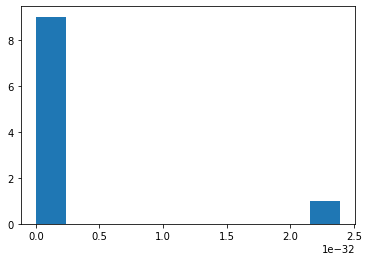

In [43]:
#plt.scatter(np.arange(len(corr_result['p-val'])), -np.log10(corr_result['p-val']))
plt.hist(corr_result['p-val'])

In [41]:
##bonferroni correction
bonf = 0.05/len(nih.columns)
cond = corr_result['p-val'] < bonf           #bonf보다 pval낮은 것들만 하기
corr_result = corr_result.loc[cond, :].sort_values(by='r') #rearrange by r value 
corr_result 

,n,r,CI95%,p-val,BF10,power
nihtbx_picture_uncorrected,10243,0.116614,"[0.1, 0.14]",2.390201e-32,3.431e+28,1.0
nihtbx_list_uncorrected,10243,0.145729,"[0.13, 0.16]",9.897163e-50,6.596e+45,1.0
nihtbx_flanker_uncorrected,10243,0.185642,"[0.17, 0.2]",4.328455e-80,1.17e+76,1.0
nihtbx_cardsort_uncorrected,10243,0.192083,"[0.17, 0.21]",1.026333e-85,4.758e+81,1.0
nihtbx_reading_uncorrected,10243,0.221544,"[0.2, 0.24]",4.289536e-114,9.751e+109,1.0
nihtbx_pattern_uncorrected,10243,0.222885,"[0.2, 0.24]",1.721934e-115,2.413e+111,1.0
nihtbx_picvocab_uncorrected,10243,0.243123,"[0.22, 0.26]",1.043597e-137,3.615e+133,1.0
nihtbx_fluidcomp_uncorrected,10243,0.260337,"[0.24, 0.28]",2.577292e-158,1.355e+154,1.0
nihtbx_cryst_uncorrected,10243,0.266182,"[0.25, 0.28]",1.115529e-165,3.051e+161,1.0
nihtbx_totalcomp_uncorrected,10243,0.304451,"[0.29, 0.32]",1.256724e-218,2.313e+214,1.0


### 2. regression

In [46]:
reg_result = pd.DataFrame()
for measure in corr_result.loc[cond, :].index:
    reg_result = pd.concat([reg_result, pd.DataFrame(pg.linear_regression(merged_data['age'], merged_data[measure])).loc[1]],axis=1)
reg_result.loc['names'] = corr_result.loc[cond, :].index
reg_result.T.sort_values(by = 'coef')

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
1,nihtbx_picture_uncorrected,0.015537,0.001308,11.882134,0.0,0.013599,0.013502,0.012973,0.0181
1,nihtbx_list_uncorrected,0.019184,0.001287,14.906634,0.0,0.021237,0.021141,0.016661,0.021707
1,nihtbx_flanker_uncorrected,0.024214,0.001266,19.118895,0.0,0.034463,0.034369,0.021731,0.026696
1,nihtbx_cardsort_uncorrected,0.025303,0.001277,19.807184,0.0,0.036896,0.036802,0.022799,0.027807
1,nihtbx_reading_uncorrected,0.029164,0.001268,22.991117,0.0,0.049082,0.048989,0.026677,0.03165
1,nihtbx_pattern_uncorrected,0.029712,0.001284,23.137491,0.0,0.049678,0.049585,0.027194,0.032229
1,nihtbx_picvocab_uncorrected,0.032036,0.001263,25.364598,0.0,0.059109,0.059017,0.02956,0.034512
1,nihtbx_fluidcomp_uncorrected,0.034338,0.001258,27.286399,0.0,0.067775,0.067684,0.031871,0.036805
1,nihtbx_cryst_uncorrected,0.034951,0.001251,27.945244,0.0,0.070853,0.070762,0.032499,0.037403
1,nihtbx_totalcomp_uncorrected,0.039877,0.001233,32.345323,0.0,0.092691,0.092602,0.03746,0.042293


In [28]:
merged_data = pd.concat([connectome, nih, demo], join='inner', axis=1)

In [37]:
#get correlation
corr_result = pd.DataFrame()
for measure in connectome.columns: #measuredㅡㄹ 받기
    corr_result = pd.concat([corr_result, pd.DataFrame(pg.corr(merged_data[measure], merged_data['age']))], axis=0)

#이거는 merged_data data에서 다른 것을 한 것은 없다

C:\Users\jungw\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [38]:
corr_result.index = connectome.columns
corr_result

,n,r,CI95%,p-val,BF10,power
con_L-BSTS_L-CACG_count,9408,-0.014848,"[-0.04, 0.01]",0.149843,0.036,0.301929
con_L-BSTS_L-CMFG_count,9408,-0.022877,"[-0.04, -0.0]",0.026492,0.151,0.602233
con_L-BSTS_L-CU_count,9408,0.018020,"[-0.0, 0.04]",0.080513,0.059,0.416093
con_L-BSTS_L-EC_count,9408,-0.009509,"[-0.03, 0.01]",0.356411,0.02,0.151674
con_L-BSTS_L-FG_count,9408,0.028578,"[0.01, 0.05]",0.005569,0.602,0.791733
...,...,...,...,...,...,...
con_R-TP_R-IN_count,9408,-0.047665,"[-0.07, -0.03]",0.000004,570.274,0.996166
con_R-TP_R-CER_count,9408,-0.000968,"[-0.02, 0.02]",0.925177,0.013,0.051009
con_R-TTG_R-IN_count,9408,0.009473,"[-0.01, 0.03]",0.358241,0.02,0.150882
con_R-TTG_R-CER_count,9408,-0.004041,"[-0.02, 0.02]",0.695144,0.014,0.067770


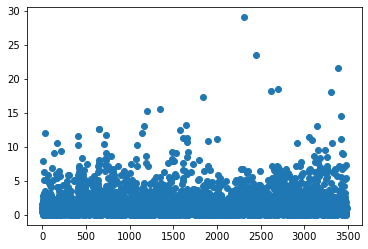

In [46]:
plt.scatter(np.arange(len(corr_result['p-val'])), -np.log10(corr_result['p-val']))

In [35]:
(84*84-84)/2

3486.0

In [49]:
bonf = 0.05 / 3486 #bon ferroni corrected p-value (i.e. equivalent p value for same effect of 0.05)(prevents p-hacking?)
cond = corr_result['p-val'] < bonf
corr_result.loc[cond, :].sort_values(by='r')

,n,r,CI95%,p-val,BF10,power
con_L-TH_L-CA_count,9408,-0.116587,"[-0.14, -0.1]",7.806775e-30,1.143e+26,1.0
con_R-PoCG_R-IN_count,9408,-0.099900,"[-0.12, -0.08]",2.658304e-22,3.922e+18,1.0
con_R-CA_R-SFG_count,9408,-0.092236,"[-0.11, -0.07]",3.120735e-19,3.618e+15,1.0
con_R-TH_R-CA_count,9408,-0.091535,"[-0.11, -0.07]",5.795345e-19,1.963e+15,1.0
con_L-SFG_L-CA_count,9408,-0.089087,"[-0.11, -0.07]",4.842255e-18,2.413e+14,1.0
...,...,...,...,...,...,...
con_R-PCU_R-RMFG_count,9408,0.081526,"[0.06, 0.1]",2.379787e-15,5.36e+11,1.0
con_L-PaCG_R-PrCG_count,9408,0.083327,"[0.06, 0.1]",5.712033e-16,2.186e+12,1.0
con_L-PTR_L-PCU_count,9408,0.084332,"[0.06, 0.1]",2.542429e-16,4.853e+12,1.0
con_R-PaCG_R-PrCG_count,9408,0.091164,"[0.07, 0.11]",8.019524e-19,1.424e+15,1.0


In [72]:
reg_result = pd.DataFrame()
for measure in corr_result.loc[cond, :].index:
    reg_result = pd.concat([reg_result, pd.DataFrame(pg.linear_regression(merged_data['age'], merged_data[measure])).loc[1]],axis=1)
reg_result.loc['names'] = corr_result.loc[cond, :].index
reg_result.T.sort_values(by)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
1,con_L-BSTS_L-MTG_count,-5.430671,0.946159,-5.7397,0.0,0.00349,0.003384,-7.285348,-3.575994
1,con_L-BSTS_L-PrCG_count,-0.393705,0.07818,-5.035868,0.0,0.002689,0.002583,-0.546956,-0.240455
1,con_L-BSTS_L-SPG_count,0.465185,0.10402,4.472091,0.000008,0.002122,0.002016,0.261284,0.669086
1,con_L-BSTS_L-SMG_count,-4.40751,0.615258,-7.16368,0.0,0.005426,0.005321,-5.613549,-3.201472
1,con_L-BSTS_R-PU_count,0.011221,0.00248,4.525374,0.000006,0.002172,0.002066,0.006361,0.016082
...,...,...,...,...,...,...,...,...,...
1,con_R-RMFG_R-SPG_count,0.641994,0.105211,6.101939,0.0,0.003943,0.003837,0.435757,0.848231
1,con_R-SFG_R-IN_count,-2.832594,0.531611,-5.328322,0.0,0.003009,0.002903,-3.874666,-1.790522
1,con_R-SPG_R-IN_count,-1.106174,0.243193,-4.548537,0.000005,0.002195,0.002089,-1.582885,-0.629462
1,con_R-SMG_R-IN_count,-1.957618,0.356079,-5.497714,0.0,0.003203,0.003097,-2.655609,-1.259627


In [66]:
pg.linear_regression(merged_data['age'], merged_data[measure]).iloc[1, :]

names             age
coef        -5.430671
se           0.946159
T             -5.7397
pval              0.0
r2            0.00349
adj_r2       0.003384
CI[2.5%]    -7.285348
CI[97.5%]   -3.575994
Name: 1, dtype: object

In [3]:
2**16

65536

## playing fun

In [15]:
import numpy as np
import pingouin as pg

import numpy as np
import pingouin as pg
# Generate random correlated samples
np.random.seed(123)
mean, cov = [4, 6], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 30).T
# Compute Pearson correlation
pg.corr(x, y).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.491,"[0.16, 0.72]",0.006,8.55,0.809


[4.44151096 4.50808079 3.67536425 6.31602219 3.33703724 4.63528714
 3.0278697  4.60167529 0.99621546 2.93737062 2.61605407 4.22254138
 5.40476826 3.92876421 4.55218052 5.62066742 5.88413129 3.28361181
 3.65342401 4.61988715 5.56130261 4.05162622 3.71268853 1.72169482
 2.03331809 5.64010487 2.88893228 3.43963558 2.35118255 2.17003785]
[7.4388564  5.00178608 7.32680079 7.88710956 4.47029684 6.54057817
 4.3889677  6.16732402 5.18300155 5.32355702 6.1067861  7.39837043
 6.76701676 4.50008351 5.69042562 4.82207832 7.18425405 5.10997613
 6.34164672 6.90351448 5.83363312 6.62543208 5.70085803 4.13460698
 6.27146142 6.60131666 4.09086955 6.50895155 6.10606873 5.23943052]


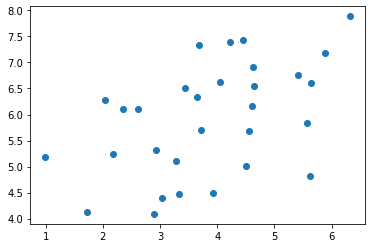

In [22]:
print(x)
print(y)
plt.scatter(x,y)